##0 - Configurações

In [ ]:
## Importar Bibliotecas

import pandas as pd
import scipy as sp
import numpy as np

In [ ]:
#conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Diego Pereira de Oliveira
# Link do inep sobre dados das escolas: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola
# Esse é um Microdados do ensino das escolas no Brasil no ano de 2019, relacionado aos docentes.
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DB/aa.csv", engine='python',sep=';') -- Ignora esse banco --
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DB/SUP_DOCENTE_2019.CSV", engine='python',sep='|')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DB/SUP_DOCENTE_20191.CSV", engine='python',sep='|')

## 1 - Pre-Processamento

In [ ]:
#crie um novo array com as colunas que você deseja
colunas_selecionadas = ['TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA',
       'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_REGIME_TRABALHO', 'TP_SEXO',
       'NU_ANO_NASCIMENTO', 'NU_IDADE', 'TP_COR_RACA',
       'IN_ATUACAO_EAD', 'IN_SUBSTITUTO']
      
novo_df = df.filter(items=colunas_selecionadas)

In [ ]:
novo_df

,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_IDADE,TP_COR_RACA,IN_ATUACAO_EAD,IN_SUBSTITUTO
0,1,1,1,5,1.0,2,1952,67,3,0.0,0.0
1,1,1,1,4,1.0,2,1969,50,3,0.0,0.0
2,1,1,1,3,1.0,2,1955,64,4,0.0,0.0
3,1,1,1,5,1.0,2,1965,54,1,0.0,0.0
4,1,1,1,5,1.0,2,1957,62,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
37336,5,1,1,3,3.0,1,1959,60,1,0.0,0.0
37337,5,1,1,4,3.0,1,1973,46,1,0.0,0.0
37338,5,1,1,5,3.0,1,1976,43,1,0.0,0.0
37339,5,1,1,4,4.0,2,1975,44,1,0.0,0.0


In [ ]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37341 entries, 0 to 37340
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TP_CATEGORIA_ADMINISTRATIVA  37341 non-null  int64  
 1   TP_ORGANIZACAO_ACADEMICA     37341 non-null  int64  
 2   TP_SITUACAO                  37341 non-null  int64  
 3   TP_ESCOLARIDADE              37341 non-null  int64  
 4   TP_REGIME_TRABALHO           36546 non-null  float64
 5   TP_SEXO                      37341 non-null  int64  
 6   NU_ANO_NASCIMENTO            37341 non-null  int64  
 7   NU_IDADE                     37341 non-null  int64  
 8   TP_COR_RACA                  37341 non-null  int64  
 9   IN_ATUACAO_EAD               36546 non-null  float64
 10  IN_SUBSTITUTO                36546 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 3.1 MB


In [ ]:
df = novo_df
df['TP_CATEGORIA_ADMINISTRATIVA'].describe()

count    37341.000000
mean         4.471144
std          0.840049
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: TP_CATEGORIA_ADMINISTRATIVA, dtype: float64

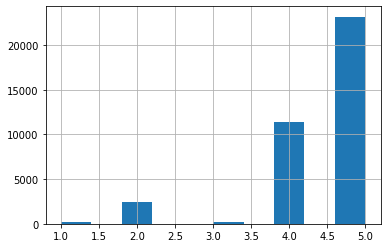

In [ ]:
df['TP_CATEGORIA_ADMINISTRATIVA'].hist()

In [ ]:
novo_df['TP_CATEGORIA_ADMINISTRATIVA'].fillna(0.0,inplace=True)


In [ ]:
teste = df
df['NU_ANO_NASCIMENTO'].describe()

count    37341.000000
mean      1971.909724
std         11.551184
min       1923.000000
25%       1964.000000
50%       1973.000000
75%       1981.000000
max       1997.000000
Name: NU_ANO_NASCIMENTO, dtype: float64

In [ ]:
for i in df['NU_ANO_NASCIMENTO']:
  try:
    a = int(i)
    if a <= 1920:
      df['NU_ANO_NASCIMENTO'] = df['NU_ANO_NASCIMENTO'].replace(i, "1")
    elif a <= 1966:
      df['NU_ANO_NASCIMENTO'] = df['NU_ANO_NASCIMENTO'].replace(i, "2")
    elif a <= 1976:
        df['NU_ANO_NASCIMENTO'] = df['NU_ANO_NASCIMENTO'].replace(i, "3")
    else:
        df['NU_ANO_NASCIMENTO'] = df['NU_ANO_NASCIMENTO'].replace(i, "4")
  except:
    pass
df

,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_IDADE,TP_COR_RACA,IN_ATUACAO_EAD,IN_SUBSTITUTO
0,1,1,1,5,1.0,2,2,67,3,0.0,0.0
1,1,1,1,4,1.0,2,3,50,3,0.0,0.0
2,1,1,1,3,1.0,2,2,64,4,0.0,0.0
3,1,1,1,5,1.0,2,2,54,1,0.0,0.0
4,1,1,1,5,1.0,2,2,62,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
37336,5,1,1,3,3.0,1,2,60,1,0.0,0.0
37337,5,1,1,4,3.0,1,3,46,1,0.0,0.0
37338,5,1,1,5,3.0,1,3,43,1,0.0,0.0
37339,5,1,1,4,4.0,2,3,44,1,0.0,0.0


In [ ]:
#Dá um erro na parte do KNN, por isso estou fazendo isso:
df.fillna(df.median(), inplace=True)

##2 - Preparação para Classificação

In [ ]:
#Coluna Base
y = df["TP_CATEGORIA_ADMINISTRATIVA"]
#O restante das colunas
X = df.drop(columns=["TP_CATEGORIA_ADMINISTRATIVA"])
print("Dataframe",df.shape)
print("Atributos",X.shape)
print("Classe",y.shape)

Dataframe (37341, 11)
Atributos (37341, 10)
Classe (37341,)


In [ ]:
#Quebra o X e o y em 2 partes= treinamento e teste. O 0.20 indica que 20% será para teste.
#y_train e y_teste são uma série do pandas, por isso não apresentam a quantidade de colunas
#uma série é uma estrutura de dados de uma única coluna, e um data frame é um conjunto de séries
#o parametro random_sate define o quanto se deve embaralhar os dados antes de fazer a divisão, como é aleatório a cada treinamento pode-se chegar a resultados diferentes
#o parâmetro stratify define que a divisão dos dados deve manter a mesma proporção de y
from sklearn.model_selection import train_test_split #fazer a divisão de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (29872, 10)
X_test (7469, 10)
y_train (29872,)
y_test (7469,)


In [ ]:
#o par X_train e y_train possuem os atributos e as classes que cada tupla possui, serão usados para treinar o modelo
#o par X_teste e y_test possuem a mesma combinação. O modelo treinado será aplicado ao X_teste e será feita a comparação dos resultados com o que já se tem em y_test
#CrossValidation

##3 - KNN

In [ ]:
# #Deu um erro e eu resolvi com isso...
# X_train.fillna(X_train.mode(), inplace=True)
# X_test.fillna(X_test.median(), inplace=True) #Eu testei mode(), mas continuou com dando erro, por isso coloquei median();

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
resultado = knn.predict(X_test)
resultado

array([2, 5, 4, ..., 4, 4, 5])

In [ ]:
#X.fillna(X_train.median(), inplace=True)

In [ ]:
df["Qualidade da predição"] = knn.predict(X)
df.sample(15,random_state=22)

,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_IDADE,TP_COR_RACA,IN_ATUACAO_EAD,IN_SUBSTITUTO,Qualidade da predição
35105,5,1,1,5,2.0,2,3,43,1,0.0,0.0,5
10009,4,1,1,4,2.0,1,4,41,0,0.0,0.0,4
10783,5,1,1,4,2.0,1,4,38,1,0.0,0.0,5
28470,4,1,1,4,3.0,2,3,48,1,0.0,0.0,5
24982,5,3,1,4,2.0,2,2,58,1,0.0,0.0,5
17652,5,2,1,4,3.0,1,2,56,1,0.0,0.0,5
8974,4,1,1,4,4.0,2,4,38,3,0.0,0.0,5
35279,5,1,1,4,1.0,1,3,46,1,0.0,0.0,5
30615,4,2,1,5,2.0,1,4,40,0,0.0,0.0,5
3158,4,2,1,5,3.0,1,2,55,3,1.0,0.0,4


In [ ]:
#fazer a predição de um exemplo
#o parâmetro tem que ser no formato de uma matriz/dataframe
print(knn.predict([[4,1,3,1,2,1,30,3,1,0]]))

[5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


##4 - Avaliação do KNN

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1    2   3     4     5   All
Real                                  
1         6   15   0     1     8    30
2        15  218   0    59   205   497
3         0    1   0     0    32    33
4         1  128   0   893  1250  2272
5         7  230  19   953  3428  4637
All      29  592  19  1906  4923  7469


In [ ]:
#relatório de métricas, para cada classe é apresentada a precisão, recall, f1score e o suporte
#o suporte é o número de ocorrencias de cada classe no conjunto y_true
#macro avg e weighted avg indicam a média de cada medida não ponderada e a média ponderada pelo suporte respectivamente
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       0.21      0.20      0.20        30
           2       0.37      0.44      0.40       497
           3       0.00      0.00      0.00        33
           4       0.47      0.39      0.43      2272
           5       0.70      0.74      0.72      4637

    accuracy                           0.61      7469
   macro avg       0.35      0.35      0.35      7469
weighted avg       0.60      0.61      0.60      7469



In [ ]:
#Otimizando o parâmetro k utilizando o GridSearch
from sklearn.model_selection import GridSearchCV
k_list = list(range(1,31))
parametros = dict(n_neighbors=k_list)
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')
#cv é cross validation

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 29} com o valor de acurácia 0.665372799565201 


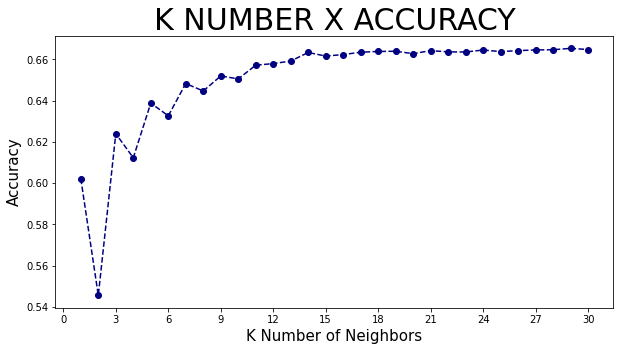

In [ ]:
#gráfico da acurácia em relação ao número de vizinhos
import matplotlib.pyplot as plt
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

##5 - Árvore de Decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import numpy as np

In [ ]:
#declarar tree como o algoritmo
clf = tree.DecisionTreeClassifier()

In [ ]:
#treinar o algoritmo com a base de treinamento
clf = clf.fit(X_train, y_train)

In [ ]:
#Features mais importantes
for feature,importancia in zip(df.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

TP_CATEGORIA_ADMINISTRATIVA:0.1840132362257556
TP_ORGANIZACAO_ACADEMICA:0.016782190315527037
TP_SITUACAO:0.0843362396122415
TP_ESCOLARIDADE:0.13428705045513387
TP_REGIME_TRABALHO:0.06632876634726372
TP_SEXO:0.011182068371905076
NU_ANO_NASCIMENTO:0.32205518267996586
NU_IDADE:0.13436655858683638
TP_COR_RACA:0.0343635247385013
IN_ATUACAO_EAD:0.012285182666869641


In [ ]:
resultado = clf.predict(X_test)
resultado

array([5, 5, 5, ..., 4, 4, 5])

In [ ]:
df["Qualidade da predição"] = clf.predict(X)
df.sample(15,random_state=22)

,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_IDADE,TP_COR_RACA,IN_ATUACAO_EAD,IN_SUBSTITUTO,Qualidade da predição
35105,5,1,1,5,2.0,2,3,43,1,0.0,0.0,5
10009,4,1,1,4,2.0,1,4,41,0,0.0,0.0,4
10783,5,1,1,4,2.0,1,4,38,1,0.0,0.0,5
28470,4,1,1,4,3.0,2,3,48,1,0.0,0.0,5
24982,5,3,1,4,2.0,2,2,58,1,0.0,0.0,5
17652,5,2,1,4,3.0,1,2,56,1,0.0,0.0,5
8974,4,1,1,4,4.0,2,4,38,3,0.0,0.0,4
35279,5,1,1,4,1.0,1,3,46,1,0.0,0.0,5
30615,4,2,1,5,2.0,1,4,40,0,0.0,0.0,5
3158,4,2,1,5,3.0,1,2,55,3,1.0,0.0,5


##6 - Classificação Máquina de Vetor Suporte (SVM)

In [ ]:
##Importar Bibliotecas

import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

tf = df
tf = tf.dropna()

#Tratamento simples
#Já tinha feito o tratamento anteriomente, mas estou refazendo para servir de códeigo isolado
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
#Separação da base de treino e da de testes
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)

In [ ]:
# Feature Scalling - Deixar as variáveis na mesma magnetude
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
 
X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_test.fit_transform(X_test)

In [ ]:
#Treino do modelo
#É neste momento que vai escolher a classe que vai usar
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [ ]:
# ["Qualidade da predição"] = classifier.predict(X)
# tf.sample(15,random_state=22)

y_pred = classifier.predict(X_test)
tf.sample(15,random_state=22)

,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_IDADE,TP_COR_RACA,IN_ATUACAO_EAD,IN_SUBSTITUTO,Qualidade da predição
35105,5,1,1,5,2.0,2,3,43,1,0.0,0.0,5
10009,4,1,1,4,2.0,1,4,41,0,0.0,0.0,4
10783,5,1,1,4,2.0,1,4,38,1,0.0,0.0,5
28470,4,1,1,4,3.0,2,3,48,1,0.0,0.0,5
24982,5,3,1,4,2.0,2,2,58,1,0.0,0.0,5
17652,5,2,1,4,3.0,1,2,56,1,0.0,0.0,5
8974,4,1,1,4,4.0,2,4,38,3,0.0,0.0,4
35279,5,1,1,4,1.0,1,3,46,1,0.0,0.0,5
30615,4,2,1,5,2.0,1,4,40,0,0.0,0.0,5
3158,4,2,1,5,3.0,1,2,55,3,1.0,0.0,5


In [ ]:
##Matrix de Confusão, pra aferir, tem que olhar a diagonal.
#Mesmo errando muito, a acurácia foi grande

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[  16    8    0    0    5]
 [   4  278    0   21   98]
 [   0    0    0    0   30]
 [   0   54    0 1362  555]
 [   0   54    0  376 4608]]
0.8386664881510242


##Qual Melhor

In [ ]:
#Acurácia KNN -  0.7112342325810731 
#Acurácia Árvore de Decisão -  
#Acurácia SVM -  0.8386664881510242